In [1]:
import json
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(img):
    plt.imshow(img.transpose(1, 2, 0))
    plt.axis("off")
    plt.show()

def plot_img_captions(id2captions, id2targets, N=10, seed=1):
    np.random.seed(seed)
    images_fn = '/data/syncap/coco2014/images/images.hdf5'
    image_features = h5py.File(images_fn, "r")
    
    if N is None:
        N = len(coco_ids)
    coco_ids = np.random.choice(sorted([i for i in id2captions]), size=N, replace=False)

    for coco_id in coco_ids[:N]:
        print("COCO ID: ", coco_id)
        
        image_data = image_features[str(coco_id)][()]
        show_img(image_data)
        
        if '<start>' in id2captions[coco_id][0]:
            print('Tagged Predictions')
            for caption in id2captions[coco_id]:
                caption = caption.replace('<pad>', '')
                print(caption)
        print('Predictions')
        for caption in id2captions[coco_id]:
            print(" ".join([tok for tok in caption.split() if not (tok.startswith('<') or tok.startswith('_'))]))
        print('Targets')
        for caption in id2targets[coco_id]:
            caption = caption.replace('<pad>', '')
            print(caption)
        if '<start>' in id2captions[coco_id][0]:
            print('Untagged Targets')
            for caption in id2targets[coco_id]:
                print(" ".join([tok for tok in caption.split() if not (tok.startswith('<') or tok.startswith('_'))]))

# BUTR_weight

In [3]:
h1 = "black_cat, big_bird, red_bus, small_plane, eat_man, lie_woman"

with open('../experiments/coco_heldout_1/butr_weight/outputs/val.re_ranking.beam_100.top_5.json') as f:
    id2captions_list = json.load(f)
id2captions = {d['image_id']: d['captions'] for d in id2captions_list}

with open('../experiments/coco_heldout_1/butr_weight/outputs/val.targets.json') as f:
    id2captions_list = json.load(f)
id2targets = {d['image_id']: d['captions'] for d in id2captions_list}

COCO ID:  533509


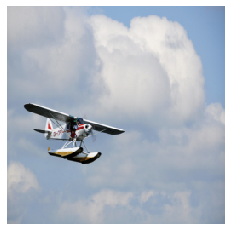

Predictions
a jet plane flying in the air with a cloudy sky
a jet plane flying in the air on a cloudy day
a plane flying high in the air on a cloudy day
a plane flying in the air on a cloudy day
there is a plane flying in the air
Targets
a small sized aircraft flying through a cloudy sky
a small sea plane flies below the clouds
a small airplane flying through a cloud filled sky with <unk> on its bottom
a single wing prop plane flying in a cloudy sky
a single engine airplane flies through a cloudy sky
COCO ID:  206492


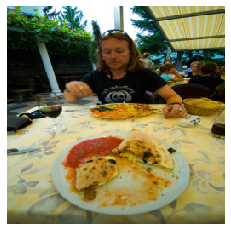

Predictions
a person sitting at a table eating a pizza
a person sitting at a table with a plate of food
a woman is sitting at a table eating a pizza
a person sitting at a table with food
a woman sitting at a table eating a plate of pizza
Targets
a person sitting at a table to a plate of food
a man sitting at a table with a plate of food
view of a plate and a man across the table eating at a large outdoor dinner
a <unk> man in a black shirt seated at a table eating
a man and an unseen partner enjoy calzones in an outdoor cafe


In [4]:
plot_img_captions(id2captions, id2targets, N=2, seed=148)

# BUTD

In [5]:
h1 = "black_cat, big_bird, red_bus, small_plane, eat_man, lie_woman"

with open('../experiments/coco_heldout_1/butd/outputs/val.beam_100.top_5.json') as f:
    id2captions_list = json.load(f)
id2captions = {d['image_id']: d['captions'] for d in id2captions_list}

with open('../experiments/coco_heldout_1/butd/outputs/val.targets.json') as f:
    id2captions_list = json.load(f)
id2targets = {d['image_id']: d['captions'] for d in id2captions_list}

COCO ID:  533509


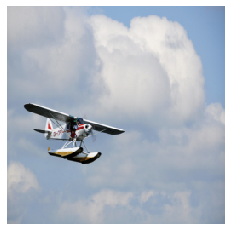

Predictions
a plane that is flying in the air
an airplane flying in the air on a cloudy day
there is a plane that is flying in the air
a plane flying in the air on a cloudy day
a jet flying in the air on a cloudy day
Targets
a small sized aircraft flying through a cloudy sky
a small sea plane flies below the clouds
a small airplane flying through a cloud filled sky with <unk> on its bottom
a single wing prop plane flying in a cloudy sky
a single engine airplane flies through a cloudy sky
COCO ID:  206492


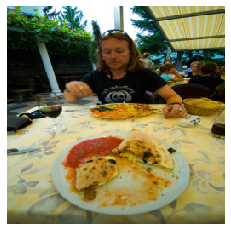

Predictions
a woman sitting at a table eating pizza
a person sitting at a table eating pizza
a man sitting at a table eating pizza
a woman sitting at a table with pizza
a woman sitting at a table eating a slice of pizza
Targets
a person sitting at a table to a plate of food
a man sitting at a table with a plate of food
view of a plate and a man across the table eating at a large outdoor dinner
a <unk> man in a black shirt seated at a table eating
a man and an unseen partner enjoy calzones in an outdoor cafe


In [6]:
plot_img_captions(id2captions, id2targets, N=2, seed=148)